In [ ]:
import numpy as np
vv = np.array([3,2,6])
vm = np.array([[3,3,6]])
m = np.array([[8,7,6], [2,4,6], [6,3,1]])
#n = np.array([[8,7,6], [2,4,6], [6,3,1]])
np.matmul(vv,m)
np.transpose(vv)
vm.T
vv.shape
np.array(np.random.rand(3))
1-m
vv-vm
np.transpose(vm)

array([[3],
       [3],
       [6]])

#Preprocessing:

In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import time
from google.colab import files
!mkdir ACCs
#!rm -rf ACCs
!mkdir model
tKEZDET = time.time()
FullTime = []

##Parameters

In [ ]:
changing = "opt"
trainID = 0  
OptID = 0

trainID_load = 0
if 10 <= trainID:
  nulls = ""
else:
  nulls = "0"

if 10 <= OptID:
  nullso = ""
else:
  nullso = "0"

download = True

#Parameters of the SETs:
train_nums = [2, 3, 4] # 3elemű, növekvő sorrned  #beégetve a gráfnál, illetve az optim-nál (megoldás: rekurzív ciklus)
test_nums = [7, 8, 9]
nValid =  1000 #beégetve a SET létrehozásnál!
nOptq = 1000

nOpt =  15 # per class
#Iterations
TrainIter=5000
Iterations = 10 # ennyiszer fut le a PROGRAM
#OptIter = 100 # queries per suppSets ----- ez egy lett. --32 képet nézünk meg az OptImgs-ből egy supp sethez
ValidIter = 5000


#Graph params:
batchS=32
size=[28,28,1]
nKernels = [16, 32, 64]
learning_rate=1e-4
VectorLength=16
nSupp=1 #beégetve az optim-nál és utána

##Creating the SETs &ClassIndices

In [ ]:
#read data and display data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True) # we will use one hot encoding, every outputclass is a separate dimension
test_images = np.concatenate((mnist.test.images, mnist.train.images[30000:55000]), axis = 0)
train_images = mnist.train.images[:30000]
test_labels = np.concatenate((mnist.test.labels, mnist.train.labels[30000:55000]), axis = 0)
train_labels = mnist.train.labels[:30000]

INTlabels=np.argmax(train_labels, 1) #one_hot-ból int-es labels-et csinál
INTlabels_t=np.argmax(test_labels, 1) #one_hot-ból int-es labels-et csinál

#Construating the SETs
   #Train
TrainInd2 = INTlabels == train_nums[0] #train_nums frissítése!!! --már nem kell :)
TrainInd3 = INTlabels == train_nums[1]
TrainInd4 = INTlabels == train_nums[2]
TrainInd23 = np.maximum(TrainInd2, TrainInd3)
TrainIndices = np.maximum(TrainInd23, TrainInd4)

TrainImgs = train_images[TrainIndices]
TrainLabels = INTlabels[TrainIndices]
TrainImgs = TrainImgs[:30000, :]
TrainLabels = TrainLabels[:30000]
TrainLabels_1h = train_labels[TrainIndices, train_nums[0]:train_nums[-1]+1]

#TESTIndices_______________________________________________________________________________________
Ind0 = INTlabels_t == test_nums[0]
Ind1 = INTlabels_t == test_nums[1]
Ind2 = INTlabels_t == test_nums[2]
#Ind01 = np.maximum(Ind0, Ind1)
#TESTIndices = np.maximum(Ind01, Ind1)

#TESTImgs, TLabels, TLabels_1h
TESTImgs0 = test_images[Ind0]
TESTImgs1 = test_images[Ind1]
TESTImgs2 = test_images[Ind2]
TESTLabels0 = INTlabels_t[Ind0]
TESTLabels1 = INTlabels_t[Ind1]
TESTLabels2 = INTlabels_t[Ind2]
TESTLabels_1h0 = test_labels[Ind0, test_nums[0]:test_nums[-1]+1]
TESTLabels_1h1 = test_labels[Ind1, test_nums[0]:test_nums[-1]+1]
TESTLabels_1h2 = test_labels[Ind2, test_nums[0]:test_nums[-1]+1]


#Valid ugyanez, csak 1000!!------------------------------------------------
#ValidImgs
ValidImgs0 = TESTImgs0[:nValid, :]
ValidImgs1 = TESTImgs1[:nValid, :]
ValidImgs2 = TESTImgs2[:nValid, :]
ValidImgs = np.concatenate((ValidImgs0, ValidImgs1, ValidImgs2), axis=0)
#ValidLabels_1h
ValidLabels_1h0 = TESTLabels_1h0[:nValid, :]
ValidLabels_1h1 = TESTLabels_1h1[:nValid, :]
ValidLabels_1h2 = TESTLabels_1h2[:nValid, :]
ValidLabels_1h = np.concatenate((ValidLabels_1h0, ValidLabels_1h1, ValidLabels_1h2), axis=0)
#ValidLabels
ValidLabels0 = TESTLabels0[:nValid]
ValidLabels1 = TESTLabels1[:nValid]
ValidLabels2 = TESTLabels2[:nValid]
ValidLabels = np.concatenate((ValidLabels0, ValidLabels1, ValidLabels2), axis=0)

#Opt-------------------------------------------------------------------------
#OptImgs
OptImgs0 = TESTImgs0[nValid:nValid+nOpt, :]
OptImgs1 = TESTImgs1[nValid:nValid+nOpt, :]
OptImgs2 = TESTImgs2[nValid:nValid+nOpt, :]
OptImgs = np.concatenate((OptImgs0, OptImgs1, OptImgs2), axis=0)
#OptLabels_1h
OptLabels_1h0 = TESTLabels_1h0[nValid:nValid+nOpt, :]
OptLabels_1h1 = TESTLabels_1h1[nValid:nValid+nOpt, :]
OptLabels_1h2 = TESTLabels_1h2[nValid:nValid+nOpt, :]
OptLabels_1h = np.concatenate((OptLabels_1h0, OptLabels_1h1, OptLabels_1h2), axis=0)
#OptLabels
OptLabels0 = TESTLabels0[nValid:nValid+nOpt]
OptLabels1 = TESTLabels1[nValid:nValid+nOpt]
OptLabels2 = TESTLabels2[nValid:nValid+nOpt]
OptLabels = np.concatenate((OptLabels0, OptLabels1, OptLabels2), axis=0)

#Optq------------------------------------------------------------ERRE nem lesz már szükség. ez hiba volt.
#OptqImgs
OptqImgs0 = TESTImgs0[nValid+nOpt:nValid+nOpt+nOptq, :]
OptqImgs1 = TESTImgs1[nValid+nOpt:nValid+nOpt+nOptq, :]
OptqImgs2 = TESTImgs2[nValid+nOpt:nValid+nOpt+nOptq, :]
OptqImgs = np.concatenate((OptqImgs0, OptqImgs1, OptqImgs2), axis=0)
#OptqLabels_1h
OptqLabels_1h0 = TESTLabels_1h0[nValid+nOpt:nValid+nOpt+nOptq, :]
OptqLabels_1h1 = TESTLabels_1h1[nValid+nOpt:nValid+nOpt+nOptq, :]
OptqLabels_1h2 = TESTLabels_1h2[nValid+nOpt:nValid+nOpt+nOptq, :]
OptqLabels_1h = np.concatenate((OptqLabels_1h0, OptqLabels_1h1, OptqLabels_1h2), axis=0)
#OptqLabels
OptqLabels0 = TESTLabels0[nValid+nOpt:nValid+nOpt+nOptq]
OptqLabels1 = TESTLabels1[nValid+nOpt:nValid+nOpt+nOptq]
OptqLabels2 = TESTLabels2[nValid+nOpt:nValid+nOpt+nOptq]
OptqLabels = np.concatenate((OptqLabels0, OptqLabels1, OptqLabels2), axis=0)

print "_________________________________________________________________________________________________________________"

#Train
ClassIndTrain=[]
for c in train_nums: #not train_nums
  c_class_indices_columnvector = np.argwhere(TrainLabels==float(c)) #visszaadja azon indeseket, ahol c classba tartozó elemek vannak
  c_class_indices_rowvector = np.reshape(c_class_indices_columnvector, -1) #oszlopvektorból sorvektort csinál
  ClassIndTrain.append(c_class_indices_rowvector)

#Opt
ClassIndOpt=[]
for c in test_nums: #not train_nums
  c_class_indices_columnvector = np.argwhere(OptLabels==float(c)) #visszaadja azon indeseket, ahol c classba tartozó elemek vannak
  ClassIndOpt.append(np.reshape(c_class_indices_columnvector, -1))
  
#Valid
ClassIndValid=[]
for c in test_nums: #not train_nums
  c_class_indices_columnvector = np.argwhere(ValidLabels==float(c)) #visszaadja azon indeseket, ahol c classba tartozó elemek vannak
  ClassIndValid.append(np.reshape(c_class_indices_columnvector, -1))

#Display ClassIndOpt
for i in range(len(ClassIndOpt)):
  print(str(test_nums[i]) + "-esek indexei:" + str(ClassIndOpt[i]))

print OptqImgs
print TESTLabels_1h1.shape
print test_labels.shape
  

W0703 06:37:48.777698 139772578293632 deprecation.py:323] From <ipython-input-5-836f239a23d2>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0703 06:37:48.780087 139772578293632 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0703 06:37:48.781649 139772578293632 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for 

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0703 06:37:49.213073 139772578293632 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0703 06:37:49.216769 139772578293632 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0703 06:37:49.323031 139772578293632 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: __init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a f

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
_________________________________________________________________________________________________________________
7-esek indexei:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
8-esek indexei:[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
9-esek indexei:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(3452, 3)
(35000, 10)


##Graph
A gráf csak 3 klasszú suprt setet tud kezelni. (Nem tudom, hogy lehet placeholder méretétől függővé tenni a neurhálók genrálását)

In [ ]:
tf.reset_default_graph()

# Support information - matrix
s_imgs = tf.placeholder(tf.float32, [batchS, len(train_nums), nSupp]+size, name = "s_imgs_ph")   # batch size, n classes, n supp imgs / class

# Query Information - vector
q_img = tf.placeholder(tf.float32, [batchS]+size, name = "q_img_ph")    # batch size
q_label = tf.placeholder(tf.int32, [batchS, len(train_nums)], name = "q_label_ph") # batch size, number of categories



"""### Network Function
Call for each support image (row of the support matrix) and for the query image.
"""

def create_network(img, size, First = False):
  currInp = img
  layer = 0
  currFilt = size[2]
  
  for k in nKernels:
    with tf.variable_scope('conv'+str(layer), reuse = not First) as varscope:
      layer += 1
      weight = tf.get_variable('weight', [3,3,currFilt,k])   # make parameters!
      currFilt = k
      bias = tf.get_variable('bias', [k], initializer=tf.constant_initializer(0.0))
      convR = tf.nn.conv2d(currInp, weight, strides=[1,1,1,1], padding="SAME")
      convR = tf.add(convR, bias)
      reluR = tf.nn.relu(convR)
      poolR = tf.nn.max_pool(reluR, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
      currInp = poolR
  #add a fully connected at the end of the network this could modify the feature vector
  with tf.variable_scope('FC', reuse = not First) as varscope:
  	CurrentShape=currInp.get_shape()
	FeatureLength = int(CurrentShape[1]*CurrentShape[2]*CurrentShape[3])
	FC = tf.reshape(currInp, [-1,FeatureLength])
	W = tf.get_variable('W',[FeatureLength,VectorLength])
	FC = tf.matmul(FC, W)
	Bias = tf.get_variable('Bias',[VectorLength])
	FC = tf.add(FC, Bias)
	FC = tf.reshape(FC, [batchS,VectorLength,1,1])
  return FC



query_features = create_network(q_img, size, First = True)
print query_features



support_list = []
query_list = []


for k in range(len(train_nums)):#--------------------
  slist=[]
  qlist=[]
  for i in range(nSupp):
    slist.append(create_network(s_imgs[:, k, i, :, :, :], size))
    qlist.append(query_features)
  slist = tf.stack(slist)
  qlist = tf.stack(qlist) 
  support_list.append(slist)
  query_list.append(qlist)
  
query_repeat = tf.stack(query_list)
supports = tf.stack(support_list)
print query_repeat
print supports


"""### Loss
Cosine distance calculation  
Application of softmax  
Minimize loss
"""

with tf.name_scope("loss"):
  dotProduct = tf.reduce_sum(tf.multiply(query_repeat, supports), [3,4,5])
  supportsMagn = tf.reduce_sum(tf.square(supports), [3,4,5])
  #supportsMagn = tf.reduce_sum(tf.square(supports), [3,4,5])
  cosDist = dotProduct / tf.clip_by_value(supportsMagn, 1e-10, float("inf"))
  print cosDist
  # per support
  cosDist = tf.transpose(cosDist,[2,0,1])
  print cosDist
  #meancosDist per class:
  MeanCosDist= tf.reduce_mean(cosDist,2)
  #maxcosDist per class:
  MaxCostDist = tf.reduce_max(cosDist,2)


  probs = tf.nn.softmax(MeanCosDist)  # defaults to last dimension

  loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(logits=MeanCosDist, labels=q_label))  # check if it's OK
  print "----------"
  print loss
  
  
with tf.name_scope("optimizer"):
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

  

with tf.name_scope("accuracy"):
  max_class = tf.argmax(MaxCostDist, 1)
  max_label = tf.argmax(q_label, 1)  
  
  total = tf.equal(max_class, max_label) 
  accuracy = tf.reduce_mean(tf.cast(total, tf.float32))


W0703 06:37:50.189553 139772578293632 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Tensor("FC/Reshape_1:0", shape=(32, 16, 1, 1), dtype=float32)


W0703 06:37:50.686347 139772578293632 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Tensor("stack_6:0", shape=(3, 1, 32, 16, 1, 1), dtype=float32)
Tensor("stack_7:0", shape=(3, 1, 32, 16, 1, 1), dtype=float32)
Tensor("loss/div:0", shape=(3, 1, 32), dtype=float32)
Tensor("loss/transpose:0", shape=(32, 3, 1), dtype=float32)
----------
Tensor("loss/Sum_2:0", shape=(), dtype=float32)


#PROGRAM (optimalizálás, validálás)

In [ ]:
tpkezdet = time.time()
for ProgIter in range(Iterations):
  print ProgIter
  print "Minutes left: %s" % ((Iterations-ProgIter)*(nOpt**3*3.081446019406528e-05/60+3.2))
  '''New OptSet________________________________________________'''
  d = nValid+nOpt+nOptq
  #OptImgs
  OptImgs0 = TESTImgs0[d+OptID*nOpt : d+(OptID+1)*nOpt, :]
  OptImgs1 = TESTImgs1[d+OptID*nOpt : d+(OptID+1)*nOpt, :]
  OptImgs2 = TESTImgs2[d+OptID*nOpt : d+(OptID+1)*nOpt, :]
  OptImgs = np.concatenate((OptImgs0, OptImgs1, OptImgs2), axis=0)

  '''____________________________________________________Optimalizaton_________________________________________________________________________________'''
  '''__________________________________________________________________________________________________________________________________________________'''
  t0 = time.time()

  #Used SET:
  nums = test_nums
  ClassIndices = ClassIndOpt
  Imgs = OptImgs
  Labels = OptLabels
  Labels_1h = OptLabels_1h

  #Reshape Sets to matrix shape (0. dim: CLASSes)
  Imgs = np.reshape(Imgs, [len(nums), nOpt]+size)

  #---------------------------------------------------------------------------------------------------------------------
  #Global variables:
  ACCopt_full = []
  ACCs_opt = []

  init = tf.global_variables_initializer()

  with tf.Session() as session:
    session.run(init)
    saver = tf.train.Saver()
    saver.restore(session, "model/234model"+nulls+str(trainID_load)) #trainID_load = 00
    It_steps = (nOpt**3)
    ###print ("\nRun time: ~" + str(It_steps*0.0068957/60) + " min [" + str(It_steps) + "it]\n")

    in_support = np.zeros([batchS, len(nums), nSupp]+size)
    in_q = np.zeros([batchS]+size)
    in_label = np.zeros([batchS, len(nums)])

    Iter = 1
    #in_support gen
    for s0 in range(nOpt):
      in_support[:,0,0,:,:,:] = batchS*[Imgs[0,s0,:,:,:]]
      for s1 in range(nOpt):
        in_support[:,1,0,:,:,:] = batchS*[Imgs[1,s1,:,:,:]]
        for s2 in range(nOpt):
          in_support[:,2,0,:,:,:] = batchS*[Imgs[2,s2,:,:,:]]

          #TESTING of selected in_support
          ACCs1SuppSet = []
          for step in range(1): # egy 32es batch-ben lesz a tesztelés (össz 3*15-3=42 lehetőség lenne)
            #in_q gen
            in_label = np.zeros([batchS, len(nums)])
            for bq in range(batchS):
              q_class = np.random.choice(len(nums))
              q_ind1class = np.random.choice(nOpt)
              while((q_class == nums[0] and q_ind1class == s0) or
                    (q_class == nums[1] and q_ind1class == s1) or
                    (q_class == nums[2] and q_ind1class == s2)
                   ):
                q_class = np.random.choice(len(nums))
                q_ind1class = np.random.choice(nOpt)
              in_q[bq,:,:,:] = Imgs[q_class, q_ind1class, :,:,:]
              in_label[bq, q_class] = 1

            ACC, LOSS = session.run([accuracy, loss], feed_dict={s_imgs: in_support, q_img: in_q, q_label: in_label})

            #if Iter%(It_steps/10) == 0:
              #print("OptIter: " + str(Iter) + " /" + str(nOpt**3))
              ###print("ACC: %s" % ACC)
              ###print("----------------------")
            Iter += 1

            ACCs1SuppSet.append(ACC)
          ACCopt_full.append(ACCs1SuppSet)
          ACCs_opt.append(np.average(ACCs1SuppSet))



  t1 = time.time()
  ###print "Full running time: %s" % ((t1-t0)/60) + " min"
  ###print "Running time / it_step: %s" % ((t1-t0)/It_steps)




  '''BestSet Indices_____________________________________________________________________________________________________'''

  ###print "Opt:"
  ###print "avg: %s" % np.average(ACCs_opt) #0.84
  ###print "var: %s" % np.var(ACCs_opt) #0.0017

  ###print "Full_var: %s" % np.var(ACCopt_full) #0.0017
  ###print "---------------------"
  ###print "Maxhely, érték: %s" % ([ACCs_opt.index(max(ACCs_opt)), max(ACCs_opt)])

  bestACC_opt = max(ACCs_opt)

  nimgs = nOpt

  #BestSetIndices
  ind_img1 = ACCs_opt.index(max(ACCs_opt))/nimgs**2      # az eredeti indexet át kell váltani nimg-es számrendszerbe
  ind_img2 = (ACCs_opt.index(max(ACCs_opt))-ind_img1*nimgs**2)/nimgs
  ind_img3 = ACCs_opt.index(max(ACCs_opt))-ind_img1*nimgs**2-ind_img2*nimgs
  BestSetIndices = [ind_img1, ind_img2, ind_img3]

  #WorstSetIndices
  ind_img1 = ACCs_opt.index(min(ACCs_opt))/nimgs**2
  ind_img2 = (ACCs_opt.index(min(ACCs_opt))-ind_img1*nimgs**2)/nimgs
  ind_img3 = ACCs_opt.index(min(ACCs_opt))-ind_img1*nimgs**2-ind_img2*nimgs
  WorstSetIndices = [ind_img1, ind_img2, ind_img3]

  ###print "Maxhely, érték: %s" % ([ACCs_opt.index(max(ACCs_opt)), max(ACCs_opt)])
  ###print BestSetIndices
  ###print "Minhely, érték: %s" % ([ACCs_opt.index(min(ACCs_opt)), min(ACCs_opt)])
  ###print WorstSetIndices


  '''________________________________________________VALIDATION________________________________________________________________________'''
  '''_______________________________________________________________________________________________________________________________'''

  '''Referency_____________________________________________________________________________________________________________________'''

  t0 = time.time()

  #Used SET:
  nums = test_nums
  ClassIndices = ClassIndValid
  Imgs = ValidImgs
  Labels = ValidLabels
  Labels_1h = ValidLabels_1h

  #Reshape Sets to matrix shape (0. dim: CLASSes)
  Imgs = np.reshape(Imgs, [len(nums), nValid]+size)
  Labels = np.reshape(Labels, [len(nums), nValid])
  Labels_1h = np.reshape(Labels_1h, [len(nums), nValid, len(nums)])

  #---------------------------------------------------------------------------------------------------------------------
  #Global variables:
  ACCs_Ref = []

  init = tf.global_variables_initializer()

  with tf.Session() as session:
    session.run(init)
    saver = tf.train.Saver()
    saver.restore(session, "model/234model"+nulls+str(trainID_load))
    ###print ("\nRun time: ~" + str(ValidIter*0.006864/60) + " min")

    in_support = np.zeros([batchS, len(nums), nSupp]+size)
    in_q = np.zeros([batchS]+size)
    in_label = np.zeros([batchS, len(nums)])

    Iter = 1
    #in_support gen
    for b in range(batchS):
      s0, s1, s2 = np.random.choice(np.arange(nValid), 3, replace = False)
      in_support[b,0,0,:,:,:] = Imgs[0,s0,:,:,:]
      in_support[b,1,0,:,:,:] = Imgs[1,s1,:,:,:]
      in_support[b,2,0,:,:,:] = Imgs[2,s2,:,:,:]

    #TESTING of selected in_support
    ACCs1SuppSet = []
    for step in range(ValidIter):
      #in_q gen
      in_label = np.zeros([batchS, len(nums)])
      for bq in range(batchS):
        while(True):
          q_class = np.random.choice(len(nums))
          q_ind1class = np.random.choice(nValid)
          in_q[bq,:,:,:] = Imgs[q_class, q_ind1class, :,:,:]
          #----------csak akkor lép ki a ciklusból, ha in_q különböző a supportoktól:
          qImg_exists_in_support = False
          for supp in  in_support[0, :, 0, :,:,:]:
            if(np.array_equal(supp, in_q[bq,:,:,:])):
              qImg_exists_in_support = True
              break
          if(qImg_exists_in_support == False):
            break
          #----------
        in_label[bq, q_class] = 1

      ACC, LOSS = session.run([accuracy, loss], feed_dict={s_imgs: in_support, q_img: in_q, q_label: in_label})

      #if Iter%(ValidIter/5) == 0:
        ###print("Iter: %s" % Iter)
        ###print("ACC: %s" % ACC)
        ###print("----------------------")
      Iter += 1

      ACCs_Ref.append(ACC)


  t1 = time.time()
  ###print "Full running time: %s" % ((t1-t0)/60) + " min"
  ###print "Running time / it_step: %s" % ((t1-t0)/ValidIter)


  '''BestSet________________________________________________________________________________________________________________________'''

  t0 = time.time()

  #Used SET:
  nums = test_nums
  ClassIndices = ClassIndValid
  Imgs = ValidImgs
  Labels = ValidLabels
  Labels_1h = ValidLabels_1h

  #Reshape Sets to matrix shape (0. dim: CLASSes)
  Imgs = np.reshape(Imgs, [len(nums), nValid]+size)
  Labels = np.reshape(Labels, [len(nums), nValid])
  Labels_1h = np.reshape(Labels_1h, [len(nums), nValid, len(nums)])
  Opt_imgs = np.reshape(OptImgs, [len(test_nums), nOpt]+size)

  #---------------------------------------------------------------------------------------------------------------------
  #Global variables:
  ACCs_Best = []

  init = tf.global_variables_initializer()

  with tf.Session() as session:
    session.run(init)
    saver = tf.train.Saver()
    saver.restore(session, "model/234model"+nulls+str(trainID_load))
    ###print ("\nRun time: ~" + str(ValidIter*0.006864/60) + " min")

    in_support = np.zeros([batchS, len(nums), nSupp]+size)
    in_q = np.zeros([batchS]+size)
    in_label = np.zeros([batchS, len(nums)])

    Iter = 1
    #in_support gen
    for b in range(batchS):
      s0, s1, s2 = BestSetIndices 
      in_support[b,0,0,:,:,:] = Opt_imgs[0,s0,:,:,:]
      in_support[b,1,0,:,:,:] = Opt_imgs[1,s1,:,:,:]
      in_support[b,2,0,:,:,:] = Opt_imgs[2,s2,:,:,:]

    #TESTING of selected in_support
    ACCs1SuppSet = []
    for step in range(ValidIter):
      #in_q gen
      in_label = np.zeros([batchS, len(nums)])
      for bq in range(batchS):
        while(True):
          q_class = np.random.choice(len(nums))
          q_ind1class = np.random.choice(nValid)
          in_q[bq,:,:,:] = Imgs[q_class, q_ind1class, :,:,:]
          #----------csak akkor lépki a ciklusból, ha in_q különböző a supportoktól:
          qImg_exists_in_support = False
          for supp in  in_support[0, :, 0, :,:,:]:
            if(np.array_equal(supp, in_q[bq,:,:,:])):
              qImg_exists_in_support = True
              break
          if(qImg_exists_in_support == False):
            break
          #----------
        in_label[bq, q_class] = 1

      ACC, LOSS = session.run([accuracy, loss], feed_dict={s_imgs: in_support, q_img: in_q, q_label: in_label})

      #if Iter%(ValidIter/5) == 0:
        ###print("Iter: %s" % Iter)
        ###print("ACC: %s" % ACC)
        ###print("----------------------")
      Iter += 1

      ACCs_Best.append(ACC)




  t1 = time.time()
  ###print "Full running time: %s" % ((t1-t0)/60) + " min"
  ###print "Running time / it_step: %s" % ((t1-t0)/ValidIter)


  '''WorstSet________________________________________________________________________________________________________________________'''

  t0 = time.time()

  #Used SET:
  nums = test_nums
  ClassIndices = ClassIndValid
  Imgs = ValidImgs
  Labels = ValidLabels
  Labels_1h = ValidLabels_1h

  #Reshape Sets to matrix shape (0. dim: CLASSes)
  Imgs = np.reshape(Imgs, [len(nums), nValid]+size)
  Labels = np.reshape(Labels, [len(nums), nValid])
  Labels_1h = np.reshape(Labels_1h, [len(nums), nValid, len(nums)])
  Opt_imgs = np.reshape(OptImgs, [len(test_nums), nOpt]+size)

  #---------------------------------------------------------------------------------------------------------------------
  #Global variables:
  ACCs_Worst = []

  init = tf.global_variables_initializer()

  with tf.Session() as session:
    session.run(init)
    saver = tf.train.Saver()
    saver.restore(session, "model/234model"+nulls+str(trainID_load))
    ###print ("\nRun time: ~" + str(ValidIter*0.006864/60) + " min")

    in_support = np.zeros([batchS, len(nums), nSupp]+size)
    in_q = np.zeros([batchS]+size)
    in_label = np.zeros([batchS, len(nums)])

    Iter = 1
    #in_support gen
    for b in range(batchS):
      s0, s1, s2 = WorstSetIndices 
      in_support[b,0,0,:,:,:] = Opt_imgs[0,s0,:,:,:]
      in_support[b,1,0,:,:,:] = Opt_imgs[1,s1,:,:,:]
      in_support[b,2,0,:,:,:] = Opt_imgs[2,s2,:,:,:]

    #TESTING of selected in_support
    ACCs1SuppSet = []
    for step in range(ValidIter):
      #in_q gen
      in_label = np.zeros([batchS, len(nums)])
      for bq in range(batchS):
        while(True):
          q_class = np.random.choice(len(nums))
          q_ind1class = np.random.choice(nValid)
          in_q[bq,:,:,:] = Imgs[q_class, q_ind1class, :,:,:]
          #----------csak akkor lépki a ciklusból, ha in_q különböző a supportoktól:
          qImg_exists_in_support = False
          for supp in  in_support[0, :, 0, :,:,:]:
            if(np.array_equal(supp, in_q[bq,:,:,:])):
              qImg_exists_in_support = True
              break
          if(qImg_exists_in_support == False):
            break
          #----------
        in_label[bq, q_class] = 1

      ACC, LOSS = session.run([accuracy, loss], feed_dict={s_imgs: in_support, q_img: in_q, q_label: in_label})

      #if Iter%(ValidIter/5) == 0:
        ###print("Iter: %s" % Iter)
        ###print("ACC: %s" % ACC)
        ###print("----------------------")
      Iter += 1

      ACCs_Worst.append(ACC)


  t1 = time.time()
  ###print "Full running time: %s" % ((t1-t0)/60) + " min"
  ###print "Running time / it_step: %s" % ((t1-t0)/ValidIter)

  '''###print AVG, VAR_________________________________________________________________________________________________'''

  ###print "AVG"
  ###print np.average(ACCs_Worst)
  ###print np.average(ACCs_Ref)
  ###print np.average(ACCs_Best)
  ###print ""
  ###print "VAR"
  ###print np.var(ACCs_Worst)
  ###print np.var(ACCs_Ref)
  ###print np.var(ACCs_Best)

  '''____________________S A V E_____________________________________________________________________________________________________'''

  np.save("ACCs/ACCs_opt"+nulls+str(trainID)+"_"+str(nOpt)+"_"+nullso+str(OptID)+".npy", ACCs_opt)
  #np.save("ACCs/ACCs_Worst"+nulls+str(trainID)+"_"+str(nOpt)+"_"+nullso+str(OptID)+".npy", ACCs_Worst)
  #np.save("ACCs/ACCs_Ref"+nulls+str(trainID)+"_"+str(nOpt)+"_"+nullso+str(OptID)+".npy", ACCs_Ref)
  #np.save("ACCs/ACCs_Best"+nulls+str(trainID)+"_"+str(nOpt)+"_"+nullso+str(OptID)+".npy", ACCs_Best)
  np.save("ACCs/avg"+nulls+str(trainID)+"_" + str(nOpt)+"_"+nullso+str(OptID)+".npy", [np.average(ACCs_Worst),
                                                                                        np.average(ACCs_Ref),
                                                                                        np.average(ACCs_Best)])
  np.save("ACCs/var"+nulls+str(trainID)+"_" + str(nOpt)+"_"+nullso+str(OptID)+".npy", [np.var(ACCs_Worst),
                                                                                        np.var(ACCs_Ref),
                                                                                        np.var(ACCs_Best)])



  '''FullTime'''
  tVEG=time.time()
  FullTime.append((tVEG-tKEZDET)/60)
  ###print "\n\nFULL TIME: %s" % FullTime[-1] + " min"


  '''______________________REPEAT Process_________________________________________________________'''
  '''_____________________________________________________________________________________________'''
  if changing == "train":
    trainID += 1
    trainID_load += 1
  if changing == "opt":
    OptID += 1

  if 10 <= trainID:
    nulls = ""
  else:
    nulls = "0"

  if 10 <= trainID:
    nullso = ""
  else:
    nullso = "0"

    
#Programidő mérése  
tpveg=time.time()
ProgTime = tpveg-tpkezdet
print "Program Time [min]: %s" % (ProgTime/60)



    
'''Init Download_________________________________________________________'''
trainID = 0
trainID_load = 0
OptID = 0

if 10 <= trainID:
  nulls = ""
else:
  nulls = "0"
if 10 <= OptID:
  nullso = ""
else:
  nullso = "0"
  
  
for i in range(Iterations):
  '''Download'''
  if download == True:
    files.download("ACCs/ACCs_opt"+nulls+str(trainID)+"_"+str(nOpt)+"_"+nullso+str(OptID)+".npy")
    #files.download("ACCs/ACCs_Worst"+nulls+str(trainID)+"_"+str(nOpt)+"_"+nullso+str(OptID)+".npy")
    #files.download("ACCs/ACCs_Ref"+nulls+str(trainID)+"_"+str(nOpt)+"_"+nullso+str(OptID)+".npy")
    #files.download("ACCs/ACCs_Best"+nulls+str(trainID)+"_"+str(nOpt)+"_"+nullso+str(OptID)+".npy")
    files.download("ACCs/avg"+nulls+str(trainID)+"_" + str(nOpt)+"_"+nullso+str(OptID)+".npy")
    files.download("ACCs/var"+nulls+str(trainID)+"_" + str(nOpt)+"_"+nullso+str(OptID)+".npy")
    
  '''______________________REPEAT Process_________________________________________________________'''
  '''_____________________________________________________________________________________________'''
  if changing == "train":
    trainID += 1
    trainID_load += 1
  if changing == "opt":
    OptID += 1

  if 10 <= trainID:
    nulls = ""
  else:
    nulls = "0"

  if 10 <= trainID:
    nullso = ""
  else:
    nullso = "0"



0
Minutes left: 32.0173331339


W0702 16:12:44.748706 139650784348032 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


1
Minutes left: 28.8155998205
2
Minutes left: 25.6138665071
3
Minutes left: 22.4121331937
4
Minutes left: 19.2103998803
5
Minutes left: 16.0086665669
6
Minutes left: 12.8069332535
7
Minutes left: 9.60519994016
8
Minutes left: 6.40346662677
9
Minutes left: 3.20173331339


MessageError: ignored

##Referency validáció újrafuttatása

In [ ]:
tpkezdet = time.time()

for ProgIter in range(Iterations):
  print ProgIter
  print "Minutes left: %s" % ((Iterations-ProgIter)*(nOpt**3*3.081446019406528e-05/60+3.2))
  
  '''New OptSet________________________________________________'''
  d = nValid+nOpt+nOptq
  #OptImgs
  OptImgs0 = TESTImgs0[d+OptID*nOpt : d+(OptID+1)*nOpt, :]
  OptImgs1 = TESTImgs1[d+OptID*nOpt : d+(OptID+1)*nOpt, :]
  OptImgs2 = TESTImgs2[d+OptID*nOpt : d+(OptID+1)*nOpt, :]
  OptImgs = np.concatenate((OptImgs0, OptImgs1, OptImgs2), axis=0)
  
  #Reshape OptImgs to matrix shape (0. dim: CLASSes)
  OptImgs = np.reshape(OptImgs, [len(nums), nOpt]+size)
  

  '''______________Validation -Referency____________________________________________________________________________'''
  t0 = time.time()

  #Used SET:
  nums = test_nums
  ClassIndices = ClassIndValid
  Imgs = ValidImgs
  Labels = ValidLabels
  Labels_1h = ValidLabels_1h

  #Reshape Sets to matrix shape (0. dim: CLASSes)
  Imgs = np.reshape(Imgs, [len(nums), nValid]+size)
  Labels = np.reshape(Labels, [len(nums), nValid])
  Labels_1h = np.reshape(Labels_1h, [len(nums), nValid, len(nums)])

  #---------------------------------------------------------------------------------------------------------------------
  #Global variables:
  ACCs_Ref = []

  init = tf.global_variables_initializer()

  with tf.Session() as session:
    session.run(init)
    saver = tf.train.Saver()
    saver.restore(session, "model/234model"+nulls+str(trainID_load))
    ###print ("\nRun time: ~" + str(ValidIter*0.006864/60) + " min")

    in_support = np.zeros([batchS, len(nums), nSupp]+size)
    in_q = np.zeros([batchS]+size)
    in_label = np.zeros([batchS, len(nums)])

    Iter = 1
    #in_support gen
    for b in range(batchS):
      s0, s1, s2 = np.random.choice(np.arange(nOpt), 3, replace = False)
      in_support[b,0,0,:,:,:] = OptImgs[0,s0,:,:,:]
      in_support[b,1,0,:,:,:] = OptImgs[1,s1,:,:,:]
      in_support[b,2,0,:,:,:] = OptImgs[2,s2,:,:,:]

    #TESTING of selected in_support
    ACCs1SuppSet = []
    for step in range(ValidIter):
      #in_q gen
      in_label = np.zeros([batchS, len(nums)])
      for bq in range(batchS):
        while(True):
          q_class = np.random.choice(len(nums))
          q_ind1class = np.random.choice(nValid)
          in_q[bq,:,:,:] = Imgs[q_class, q_ind1class, :,:,:]
          #----------csak akkor lép ki a ciklusból, ha in_q különböző a supportoktól:
          qImg_exists_in_support = False
          for supp in  in_support[0, :, 0, :,:,:]:
            if(np.array_equal(supp, in_q[bq,:,:,:])):
              qImg_exists_in_support = True
              break
          if(qImg_exists_in_support == False):
            break
          #----------
        in_label[bq, q_class] = 1

      ACC, LOSS = session.run([accuracy, loss], feed_dict={s_imgs: in_support, q_img: in_q, q_label: in_label})

      #if Iter%(ValidIter/5) == 0:
        ###print("Iter: %s" % Iter)
        ###print("ACC: %s" % ACC)
        ###print("----------------------")
      Iter += 1

      ACCs_Ref.append(ACC)


  t1 = time.time()
  ###print "Full running time: %s" % ((t1-t0)/60) + " min"
  ###print "Running time / it_step: %s" % ((t1-t0)/ValidIter)
  

  '''______________________REPEAT Process_________________________________________________________'''
  '''_____________________________________________________________________________________________'''
  if changing == "train":
    trainID += 1
    trainID_load += 1
  if changing == "opt":
    OptID += 1

  if 10 <= trainID:
    nulls = ""
  else:
    nulls = "0"

  if 10 <= trainID:
    nullso = ""
  else:
    nullso = "0"
    

    
'''FullTime'''
tVEG=time.time()
FullTime.append((tVEG-tKEZDET)/60)
###print "\n\nFULL TIME: %s" % FullTime[-1] + " min"


0
Minutes left: 32.0173331339
2
Minutes left: 25.6138665071
3
Minutes left: 22.4121331937
4
Minutes left: 19.2103998803
5
Minutes left: 16.0086665669
6
Minutes left: 12.8069332535
7
Minutes left: 9.60519994016
8
Minutes left: 6.40346662677
9
Minutes left: 3.20173331339


In [ ]:

OptImgs = np.reshape(OptImgs, [len(nums), nOpt]+size)

In [ ]:
OptImgs.shape

(3, 15, 28, 28, 1)

###Save and Download

In [ ]:
#TODO

##Download

In [ ]:
'''Init Download_________________________________________________________'''
trainID = 0
trainID_load = 0
OptID = 0

if 10 <= trainID:
  nulls = ""
else:
  nulls = "0"
if 10 <= OptID:
  nullso = ""
else:
  nullso = "0"
  
  
for i in range(Iterations):
  '''Download'''
  if download == True:
    files.download("ACCs/ACCs_opt"+nulls+str(trainID)+"_"+str(nOpt)+"_"+nullso+str(OptID)+".npy")
    files.download("ACCs/avg"+nulls+str(trainID)+"_" + str(nOpt)+"_"+nullso+str(OptID)+".npy")
    files.download("ACCs/var"+nulls+str(trainID)+"_" + str(nOpt)+"_"+nullso+str(OptID)+".npy")
    
  '''______________________REPEAT Process_________________________________________________________'''
  '''_____________________________________________________________________________________________'''
  if changing == "train":
    trainID += 1
    trainID_load += 1
  if changing == "opt":
    OptID += 1

  if 10 <= trainID:
    nulls = ""
  else:
    nulls = "0"

  if 10 <= trainID:
    nullso = ""
  else:
    nullso = "0"



##Plotting


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


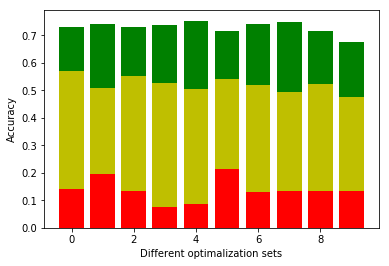

616
1.0
311
0.75273126


In [ ]:
import matplotlib.pyplot as plt


#load
acc=[]
avgW_opt, avgR_opt, avgB_opt = [], [], []
for i in range(10):
  #acc.append(np.load("ACCs_OptImgCombs"+ str(i) +"_5_5000.npy"))
  acc.append(np.load("ACCs/ACCs_opt00_15_0"+ str(i) +".npy"))
  avgW_opt.append(min(acc[i]))
  avgR_opt.append(np.average(acc[i]))
  avgB_opt.append(max(acc[i]))

  
  
avgW, avgR, avgB = [], [], []
for i in range(10):
  WRB = np.load("ACCs/avg00_15_0"+ str(i) +".npy")
  avgW.append(WRB[0])
  avgR.append(WRB[1])
  avgB.append(WRB[2])
  
#convert
'''
for i in range(10):
  avgW.append(avg[i][0])
  avgR.append(avg[i][1])
  avgB.append(avg[i][2])
'''

#plot
plt.hold(True)

plt.bar(range(10), avgB, color = 'g')
plt.bar(range(10), avgR, color = 'y')
plt.bar(range(10), avgW, color = 'r' )

#plt.plot(avgR)
#plt.plot(avgW)

plt.xlabel('Different optimalization sets')
plt.ylabel('Accuracy')

#plt.plot(np.zeros(10))
#plt.plot(np.ones(10))
plt.show()



#Prints:
print np.argmax(acc[9])
print acc[9][616]
i = 616
_100 = i/15**2
_10 = (i-_100*15**2)/15
_1 = (i-_100*15**2-_10*15)
i2 = _100*100+_10*10+_1
print i2
print avgB[4]


In [ ]:
accWRB = [ACCs_Worst, ACCs_Ref, ACCs_Best]
len(accWRB[0])

BestInds = np.ndarray([10,3], dtype = int)
for i in range(10):
  ind = np.argmax(acc[i])
  BestInds[i,0] = ind/15**2
  BestInds[i,1] = (ind-BestInds[i,0]*15**2)/15
  BestInds[i,2] = ind-BestInds[i,0]*15**2-BestInds[i,1]*15

  
#PRINT
for i in range(10):
  print str(i) + " BestAcc: " + str(avgB[i]) + "    BestInd: "+ str(BestInds[i])
  
  
print BestInds


# [4] -es opthalmaz, [2, 12, 8] indexű a legjobb. (acc= 0.7527)

#[0]-ás opthalmazból:

0 BestAcc: 0.7312    BestInd: [ 2 10  8]
1 BestAcc: 0.741025    BestInd: [2 4 0]
2 BestAcc: 0.7282063    BestInd: [ 5  5 12]
3 BestAcc: 0.7382563    BestInd: [9 8 0]
4 BestAcc: 0.75273126    BestInd: [ 2 12  8]
5 BestAcc: 0.71709377    BestInd: [ 7  0 12]
6 BestAcc: 0.74070626    BestInd: [0 3 0]
7 BestAcc: 0.7489188    BestInd: [ 7 11  2]
8 BestAcc: 0.7141687    BestInd: [3 0 0]
9 BestAcc: 0.6755813    BestInd: [ 2 11  1]
[[ 2 10  8]
 [ 2  4  0]
 [ 5  5 12]
 [ 9  8  0]
 [ 2 12  8]
 [ 7  0 12]
 [ 0  3  0]
 [ 7 11  2]
 [ 3  0  0]
 [ 2 11  1]]


In [ ]:
BestInds = np.ndarray([10,3], dtype = int)
for i in range(10):
  ind = np.argmin(acc[i])
  BestInds[i,0] = ind/15**2
  BestInds[i,1] = (ind-BestInds[i,0]*15**2)/15
  BestInds[i,2] = ind-BestInds[i,0]*15**2-BestInds[i,1]*15


NameError: ignored